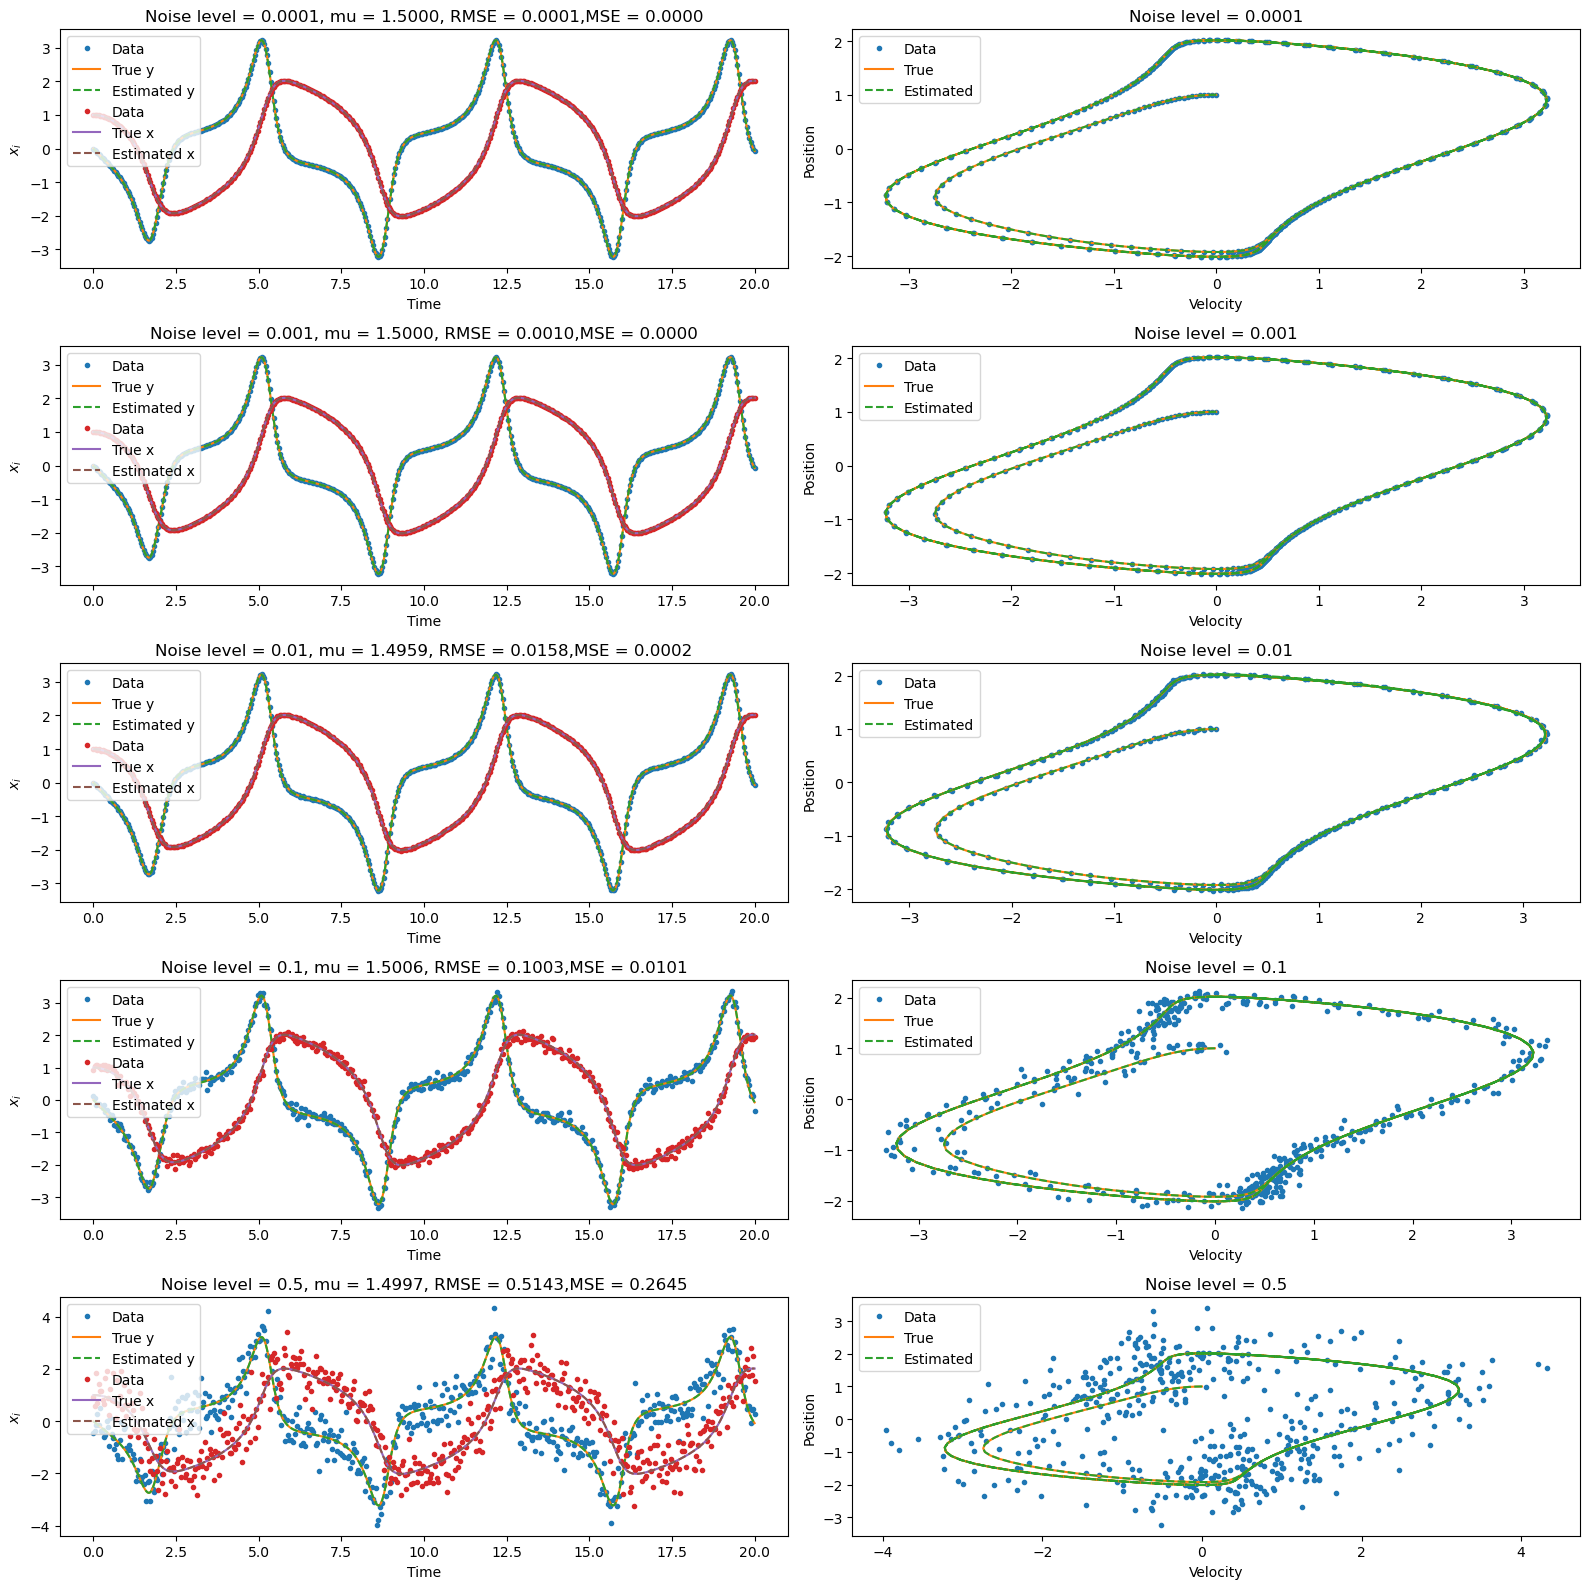

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the Van der Pol oscillator function
def van_der_pol(t, y, mu):
    x, v = y
    dxdt = v
    dvdt = mu*(1 - x**2)*v - x
    return [dxdt, dvdt]


# Define the objective function
def objective(x, t, y_data):
    y0 = [1.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: van_der_pol(t, y, x[0]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)


# Generate noisy data for different noise levels
t = np.linspace(0, 20, 500)
mu_true = 1.5
y_true = solve_ivp(lambda t, y: van_der_pol(t, y, mu_true), [t[0], t[-1]], [1.0, 0.0], t_eval=t).y
noise_levels = [0.0001, 0.001, 0.01, 0.1, 0.5]

# Plot the results
fig, axs = plt.subplots(5, 2, figsize=(16, 16))
for i, noise_level in enumerate(noise_levels):
    row = i % 5
    col = i // 5

    y_data = y_true + noise_level*np.random.randn(*y_true.shape)

    # Estimate the parameter using trust region method
    x0 = [1.44]  # initial guess for mu
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None)])
    mu_opt = res.x[0]

    # Solve the differential equation using the optimized parameter
    y0 = [1.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: van_der_pol(t, y, mu_opt), [t[0], t[-1]], y0, t_eval=t)

    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y)**2)
    rmse = np.sqrt(mse)

    axs[row, col].plot(t, y_data[1], '.', label='Data')
    axs[row, col].plot(t, y_true[1], '-', label='True y')
    axs[row, col].plot(t, sol.y[1], '--', label='Estimated y')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f"Noise level = {noise_level}, mu = {mu_opt:.4f}, RMSE = {rmse:.4f},MSE = {mse:.4f}")
    #axs[row, col].set_title(f"Noise level = {noise_level}")
    axs[row, col].legend()

    axs[row, col].plot(t, y_data[0], '.', label='Data')
    axs[row, col].plot(t, y_true[0], '-', label='True x')
    axs[row, col].plot(t, sol.y[0], '--', label='Estimated x')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('$x_{i}$')
    axs[row, col].set_title(f"Noise level = {noise_level}, mu = {mu_opt:.4f}, RMSE = {rmse:.4f},MSE = {mse:.4f}")
    #axs[row, col].set_title(f"Noise level = {noise_level}")
    axs[row, col].legend()
    
    # Plot the position-velocity phase portrait
    ax = axs[row, col+1]
    ax.plot(y_data[1], y_data[0], '.', label='Data')
    ax.plot(y_true[1], y_true[0], '-', label='True')
    ax.plot(sol.y[1], sol.y[0], '--', label='Estimated')
    ax.set_title(f"Noise level = {noise_level}")
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Position')
    ax.legend()
    
plt.tight_layout()
plt.show()


## Iterate the simulation 10 times with the different levels of Gaussian noise

Average estimated mu for noise level 0.0001 = 1.4999999598420632
Average RMSE for noise level 0.0001 = 0.0001004667081368745
Average estimated mu for noise level 0.001 = 1.499993011503323
Average RMSE for noise level 0.001 = 0.0009965254334360749
Average estimated mu for noise level 0.01 = 1.498730255781131
Average RMSE for noise level 0.01 = 0.01184461591661832
Average estimated mu for noise level 0.1 = 1.4981993392208395
Average RMSE for noise level 0.1 = 0.09963111097626791


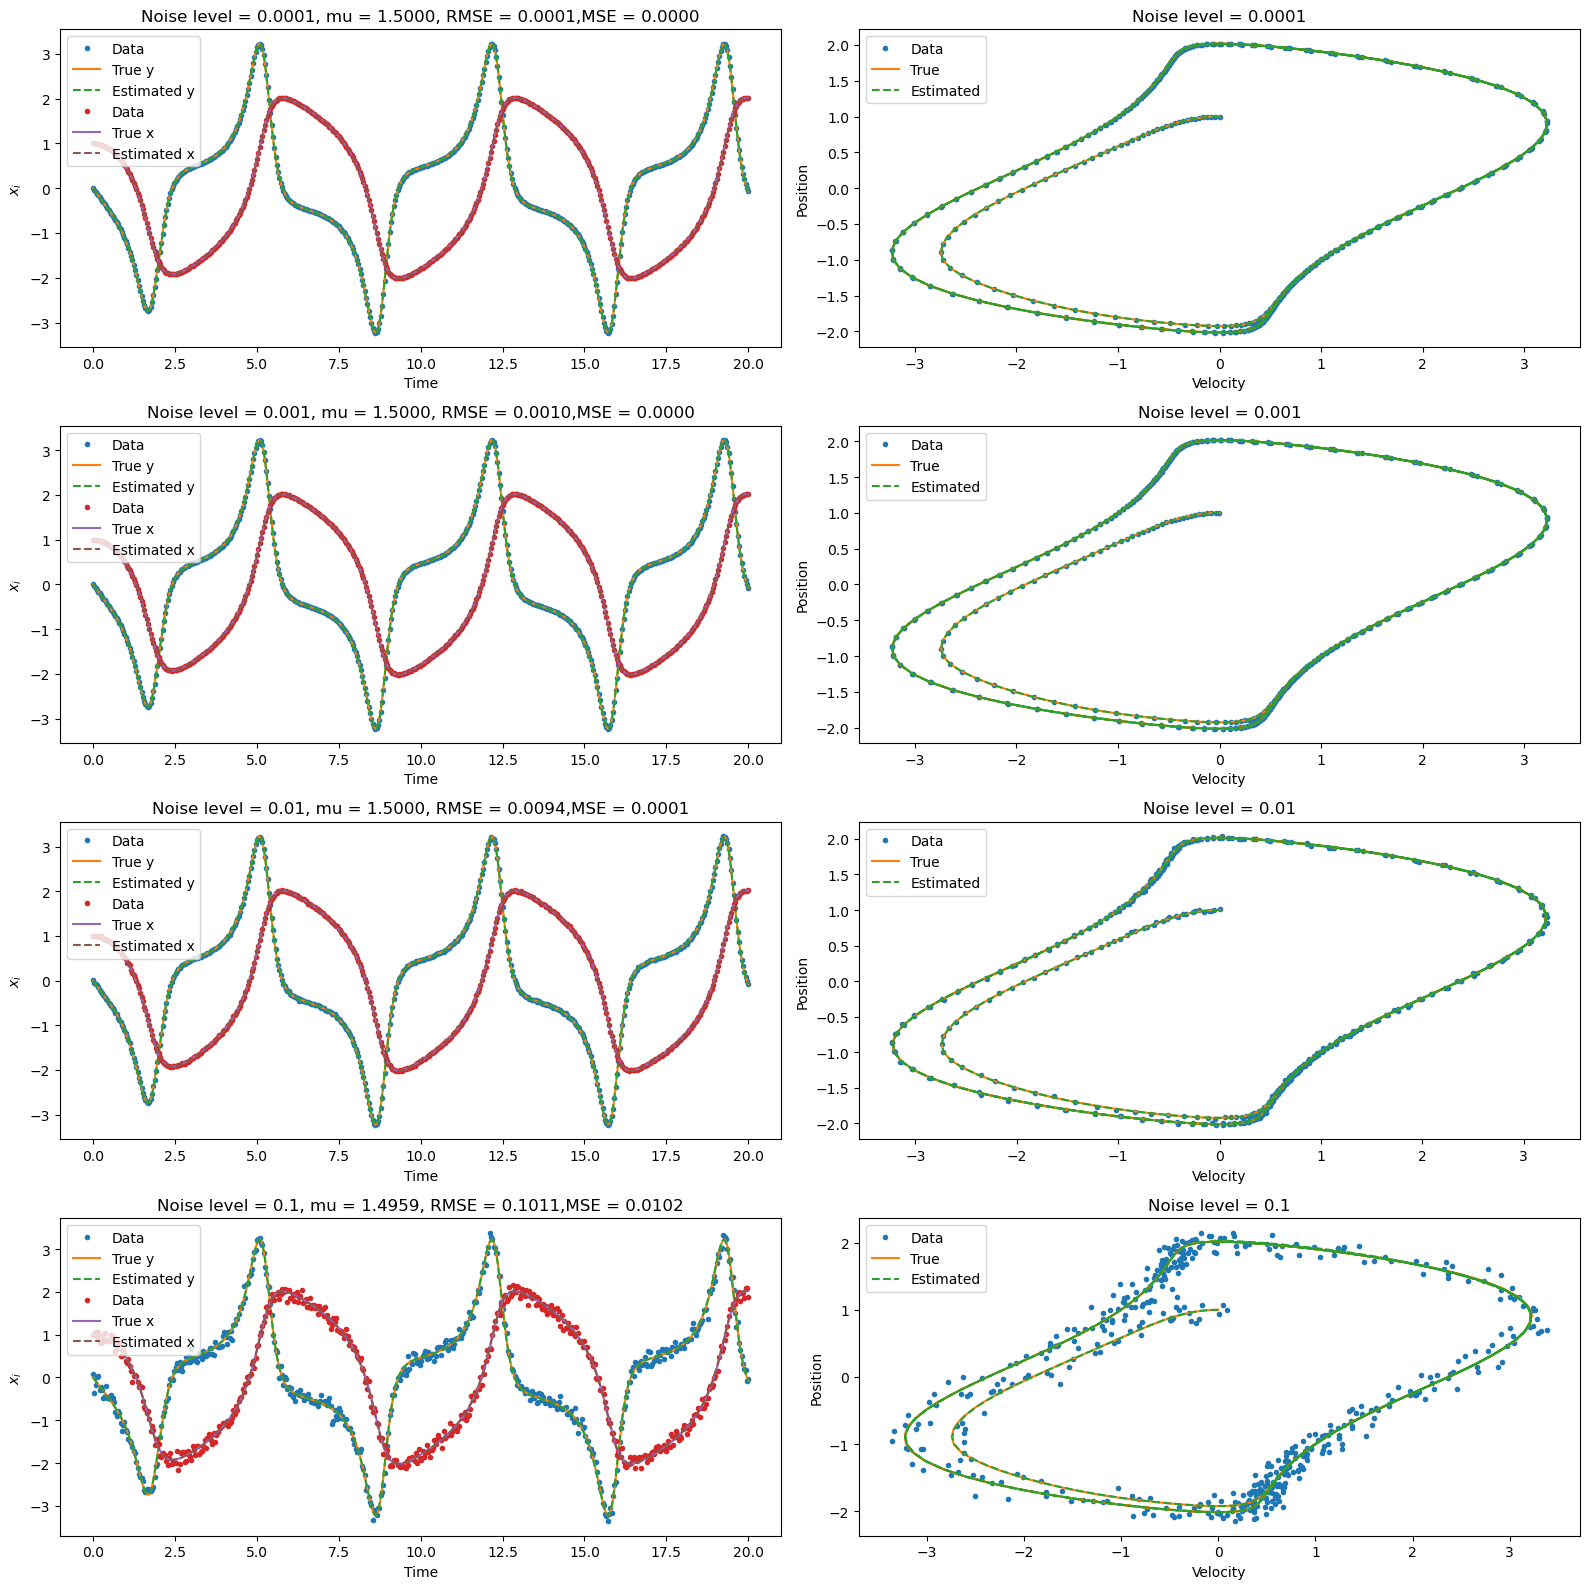

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the Van der Pol oscillator function
def van_der_pol(t, y, mu):
    x, v = y
    dxdt = v
    dvdt = mu*(1 - x**2)*v - x
    return [dxdt, dvdt]


# Define the objective function
def objective(x, t, y_data):
    y0 = [1.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: van_der_pol(t, y, x[0]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)


# Generate noisy data for different noise levels
t = np.linspace(0, 20, 500)
mu_true = 1.5
y_true = solve_ivp(lambda t, y: van_der_pol(t, y, mu_true), [t[0], t[-1]], [1.0, 0.0], t_eval=t).y
noise_levels = [0.0001, 0.001, 0.01, 0.1]

n_iterations = 10
estimated_mu_values = []
rmse_values = []

for iteration in range(n_iterations):
    estimated_mu_values_iter = []
    rmse_values_iter = []

    for noise_level in noise_levels:
        # Generate noisy data
        y_data = y_true + noise_level * np.random.randn(*y_true.shape)

        # Estimate the parameter using trust region method
        x0 = [1.44]  # initial guess for mu
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None)])
        mu_opt = res.x[0]
        estimated_mu_values_iter.append(mu_opt)

        # Solve the differential equation using the optimized parameter
        y0 = [1.0, 0.0]  # initial conditions
        sol = solve_ivp(lambda t, y: van_der_pol(t, y, mu_opt), [t[0], t[-1]], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        rmse_values_iter.append(rmse)

    estimated_mu_values.append(estimated_mu_values_iter)
    rmse_values.append(rmse_values_iter)

estimated_mu_values = np.array(estimated_mu_values)
rmse_values = np.array(rmse_values)

average_mu_values = np.mean(estimated_mu_values, axis=0)
average_rmse_values = np.mean(rmse_values, axis=0)

for i, noise_level in enumerate(noise_levels):
    print(f"Average estimated mu for noise level {noise_level} = {average_mu_values[i]}")
    print(f"Average RMSE for noise level {noise_level} = {average_rmse_values[i]}")

# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
for i, noise_level in enumerate(noise_levels):
    row = i % 4
    col = i // 4

    y_data = y_true + noise_level*np.random.randn(*y_true.shape)

    # Estimate the parameter using trust region method
    x0 = [1.44]  # initial guess for mu
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None)])
    mu_opt = res.x[0]

    # Solve the differential equation using the optimized parameter
    y0 = [1.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: van_der_pol(t, y, mu_opt), [t[0], t[-1]], y0, t_eval=t)

    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y)**2)
    rmse = np.sqrt(mse)

    axs[row, col].plot(t, y_data[1], '.', label='Data')
    axs[row, col].plot(t, y_true[1], '-', label='True y')
    axs[row, col].plot(t, sol.y[1], '--', label='Estimated y')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f"Noise level = {noise_level}, mu = {mu_opt:.4f}, RMSE = {rmse:.4f},MSE = {mse:.4f}")
    #axs[row, col].set_title(f"Noise level = {noise_level}")
    axs[row, col].legend()

    axs[row, col].plot(t, y_data[0], '.', label='Data')
    axs[row, col].plot(t, y_true[0], '-', label='True x')
    axs[row, col].plot(t, sol.y[0], '--', label='Estimated x')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('$x_{i}$')
    axs[row, col].set_title(f"Noise level = {noise_level}, mu = {mu_opt:.4f}, RMSE = {rmse:.4f},MSE = {mse:.4f}")
    axs[row, col].legend()
    
    # Plot the position-velocity phase portrait
    ax = axs[row, col+1]
    ax.plot(y_data[1], y_data[0], '.', label='Data')
    ax.plot(y_true[1], y_true[0], '-', label='True')
    ax.plot(sol.y[1], sol.y[0], '--', label='Estimated')
    ax.set_title(f"Noise level = {noise_level}")
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Position')
    ax.legend()
    
plt.tight_layout()
plt.show()

## With colored noise (pink noise)

/tmp/ipykernel_127982/3987649227.py:42: RuntimeWarning: divide by zero encountered in true_divide
  power_spectrum = np.sqrt(1 / np.abs(freq))


Average estimated mu for noise level 0.0001 = 1.5713481554210265
Average RMSE for noise level 0.0001 = 0.15153130553540042
Average estimated mu for noise level 0.001 = 1.5536692908989433
Average RMSE for noise level 0.001 = 0.10934213605406
Average estimated mu for noise level 0.01 = 1.5370177404211476
Average RMSE for noise level 0.01 = 0.07965185429947422
Average estimated mu for noise level 0.1 = 1.5307772428358204
Average RMSE for noise level 0.1 = 0.11072603969493486


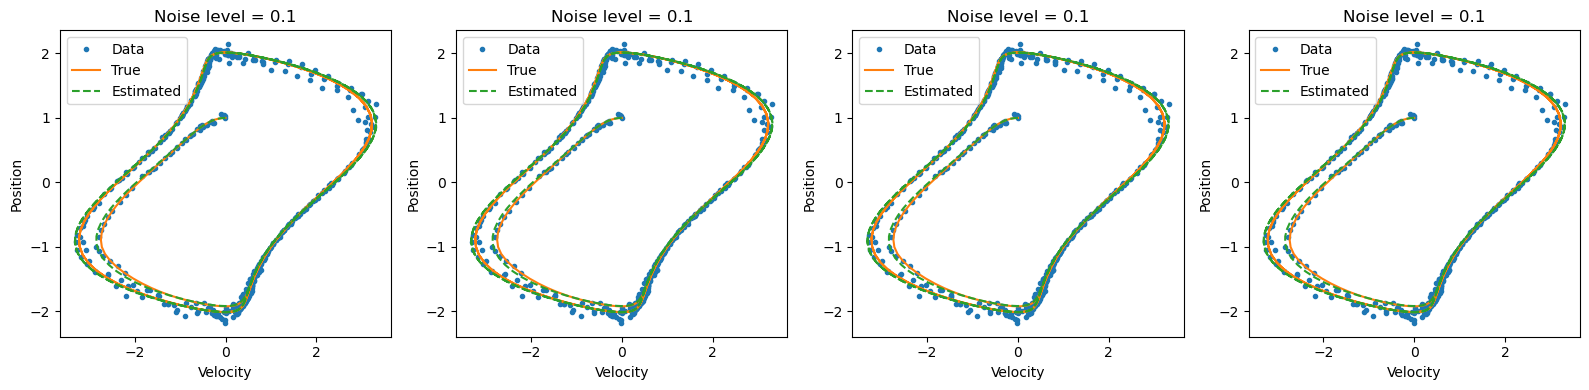

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the Van der Pol oscillator function
def van_der_pol(t, y, mu):
    x, v = y
    dxdt = v
    dvdt = mu*(1 - x**2)*v - x
    return [dxdt, dvdt]


# Define the objective function
def objective(x, t, y_data):
    y0 = [1.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: van_der_pol(t, y, x[0]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)


# Generate noisy data for different noise levels
t = np.linspace(0, 20, 500)
mu_true = 1.5
y_true = solve_ivp(lambda t, y: van_der_pol(t, y, mu_true), [t[0], t[-1]], [1.0, 0.0], t_eval=t).y
noise_levels = [0.0001, 0.001, 0.01, 0.1]

n_iterations = 10
estimated_mu_values = []
rmse_values = []

for iteration in range(n_iterations):
    estimated_mu_values_iter = []
    rmse_values_iter = []

    for noise_level in noise_levels:
        # Generate colored noise with the desired spectral characteristics
        n = len(t)
        dt = t[1] - t[0]
        freq = np.fft.fftfreq(n, dt)
        power_spectrum = np.sqrt(1 / np.abs(freq))
        power_spectrum[0] = 0
        colored_noise = np.fft.ifft(np.fft.fft(np.random.normal(0, 1, n)) * power_spectrum).real

        desired_length = y_true.shape[1]  # Adjusted to match the length of the true solution
        y_data = y_true + noise_level * colored_noise

        # Estimate the parameter using trust region method
        x0 = [1.40]  # initial guess for mu
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None)])
        mu_opt = res.x[0]
        estimated_mu_values_iter.append(mu_opt)

        # Solve the differential equation using the optimized parameter
        y0 = [1.0, 0.0]  # initial conditions
        sol = solve_ivp(lambda t, y: van_der_pol(t, y, mu_opt), [t[0], t[-1]], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        rmse_values_iter.append(rmse)

    estimated_mu_values.append(estimated_mu_values_iter)
    rmse_values.append(rmse_values_iter)

estimated_mu_values = np.array(estimated_mu_values)
rmse_values = np.array(rmse_values)

average_mu_values = np.mean(estimated_mu_values, axis=0)
average_rmse_values = np.mean(rmse_values, axis=0)

for i, noise_level in enumerate(noise_levels):
    print(f"Average estimated mu for noise level {noise_level} = {average_mu_values[i]}")
    print(f"Average RMSE for noise level {noise_level} = {average_rmse_values[i]}")

# Plot the results
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in enumerate(axs.flat):
    ax.plot(y_data[1], y_data[0], '.', label='Data')
    ax.plot(y_true[1], y_true[0], '-', label='True')
    ax.plot(sol.y[1], sol.y[0], '--', label='Estimated')
    ax.set_title(f"Noise level = {noise_level}")
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Position')
    ax.legend()

plt.tight_layout()
plt.show()


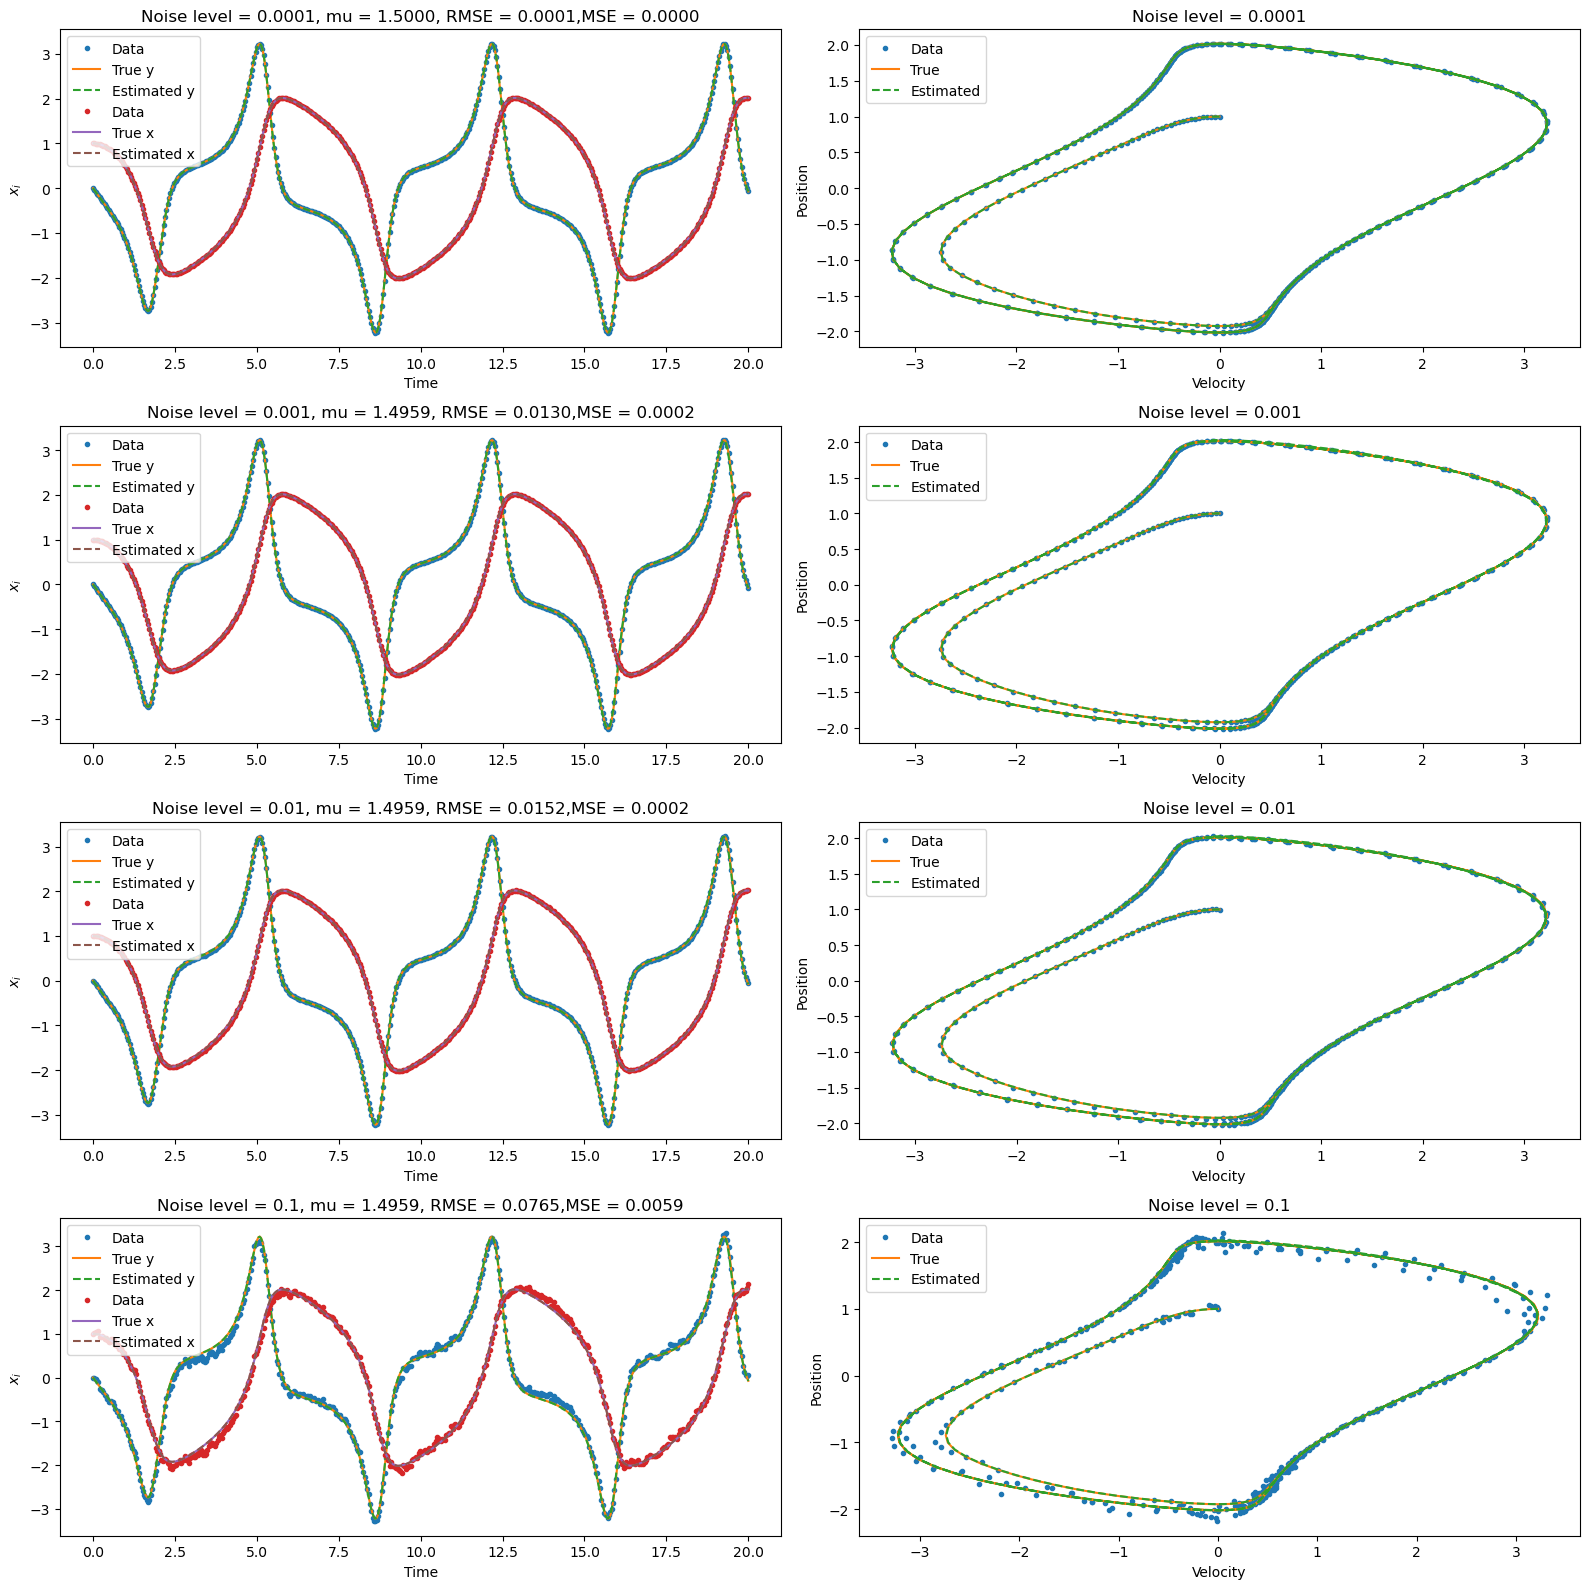

In [4]:
# Plot the results
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
for i, noise_level in enumerate(noise_levels):
    row = i % 4
    col = i // 4

    y_data = y_true + noise_level * colored_noise

    # Estimate the parameter using trust region method
    x0 = [1.44]  # initial guess for mu
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None)])
    mu_opt = res.x[0]

    # Solve the differential equation using the optimized parameter
    y0 = [1.0, 0.0]  # initial conditions
    sol = solve_ivp(lambda t, y: van_der_pol(t, y, mu_opt), [t[0], t[-1]], y0, t_eval=t)

    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y)**2)
    rmse = np.sqrt(mse)

    axs[row, col].plot(t, y_data[1], '.', label='Data')
    axs[row, col].plot(t, y_true[1], '-', label='True y')
    axs[row, col].plot(t, sol.y[1], '--', label='Estimated y')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('y')
    axs[row, col].set_title(f"Noise level = {noise_level}, mu = {mu_opt:.4f}, RMSE = {rmse:.4f},MSE = {mse:.4f}")
    #axs[row, col].set_title(f"Noise level = {noise_level}")
    axs[row, col].legend()

    axs[row, col].plot(t, y_data[0], '.', label='Data')
    axs[row, col].plot(t, y_true[0], '-', label='True x')
    axs[row, col].plot(t, sol.y[0], '--', label='Estimated x')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('$x_{i}$')
    axs[row, col].set_title(f"Noise level = {noise_level}, mu = {mu_opt:.4f}, RMSE = {rmse:.4f},MSE = {mse:.4f}")
    axs[row, col].legend()
    
    # Plot the position-velocity phase portrait
    ax = axs[row, col+1]
    ax.plot(y_data[1], y_data[0], '.', label='Data')
    ax.plot(y_true[1], y_true[0], '-', label='True')
    ax.plot(sol.y[1], sol.y[0], '--', label='Estimated')
    ax.set_title(f"Noise level = {noise_level}")
    ax.set_xlabel('Velocity')
    ax.set_ylabel('Position')
    ax.legend()
    
plt.tight_layout()
plt.show()